## Introduction

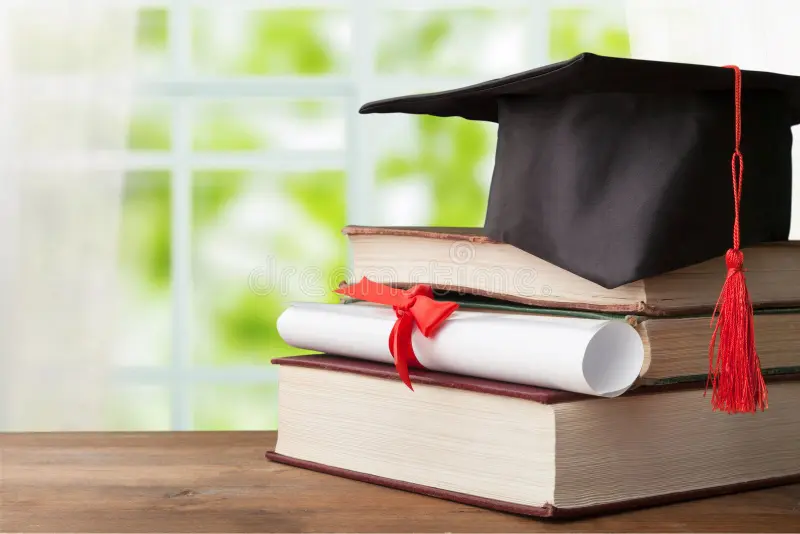
#### Context

    The context for classification with an academic success dataset involves using machine learning to predict student outcomes. Here's a breakdown:

#### Goal:  
    Identify students at risk of dropping out or who are likely to succeed.
    
#### Data: 
    The dataset contains information about students, including:
        1. Demographics (age, marital status)
        2. Academic performance (grades, course enrollment)
        3. Socioeconomic factors (parents' education, unemployment rate)

#### Classification Task:
    The model is trained to categorize students into different groups based on a target variable, such as:
        1. Graduate
        2. Dropout
        3. Enrolled (continuing studies)


#### Benefits:
    Early identification of at-risk students allows institutions to provide targeted support.
    Improved resource allocation for student success programs.
    Can inform educational policies and interventions.

#### Challenges:
    Data quality and fairness are crucial.
    Model interpretability: Understanding why the model makes certain predictions is important.
    Ethical considerations: Privacy and potential bias in the data or model.



## Importing The Libraries

In [161]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures


import matplotlib.pyplot as plt
import seaborn as sns

## Importing the given traing data

In [163]:
df = pd.read_csv('playground_series_data//train.csv')

## Exploratiry data analysis

#### Distribution of Data

In [166]:
# dataset
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [167]:
#Get the shape of your dataframe
X_shape, y_shape = df.shape
print('Total number of rows are ',X_shape,'\n','Total numbers of coulumns are ',y_shape)

Total number of rows are  76518 
 Total numbers of coulumns are  38


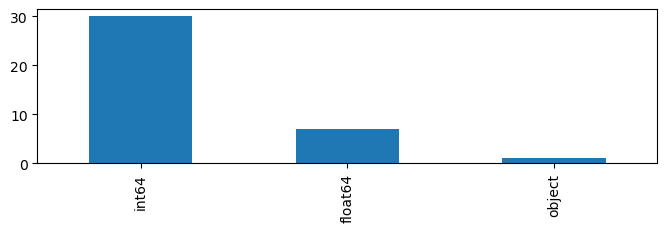

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [168]:
# Get a detailed view of your dataframe
plt.figure(figsize=(8,2))
dtypes_value = df.dtypes.value_counts()
dtypes_value.plot.bar()
plt.show()
df.info()

In [169]:
#Get the features of your dataset
df.iloc[:,:-1].columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

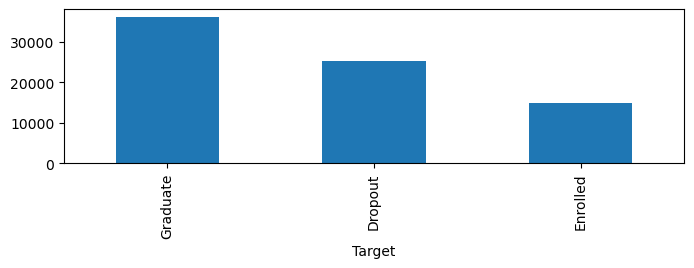

In [170]:
# Analyse the target
plt.figure(figsize=(8,2))
target=df.Target
target.value_counts().plot.bar()
plt.show()

#### Analyse the realtion between features and target

In [172]:
#Create a function to show the relation between any column and the academic status
def col_relation_target(col):    
    df_MarStat_Acdmc = df[[col,'Target']]
    df_MarStat_Acdmc_Grad = df_MarStat_Acdmc[df_MarStat_Acdmc['Target'] == 'Graduate']
    df_MarStat_Acdmc_Grad=df_MarStat_Acdmc_Grad.groupby(col).count().reset_index()
    df_MarStat_Acdmc_Grad.rename(columns={'Target' : 'Graduated'},inplace = True)
    
    df_MarStat_Acdmc_Enrld = df_MarStat_Acdmc[df_MarStat_Acdmc['Target'] == 'Enrolled']
    df_MarStat_Acdmc_Enrld=df_MarStat_Acdmc_Enrld.groupby(col).count().reset_index()
    df_MarStat_Acdmc_Enrld.rename(columns={'Target' : 'Enrolled'},inplace = True)
    
    df_MarStat_Acdmc_Drpt = df_MarStat_Acdmc[df_MarStat_Acdmc['Target'] == 'Dropout']
    df_MarStat_Acdmc_Drpt=df_MarStat_Acdmc_Drpt.groupby(col).count().reset_index()
    df_MarStat_Acdmc_Drpt.rename(columns={'Target' : 'Dropout'},inplace = True)
    
    df_MarStat_Acdmc_mod = pd.merge(df_MarStat_Acdmc_Grad,df_MarStat_Acdmc_Enrld,on=col,how="inner")
    df_MarStat_Acdmc_mod = pd.merge(df_MarStat_Acdmc_mod,df_MarStat_Acdmc_Drpt,on=col,how="inner")
    plt.figure(figsize=(10,3))
    df_MarStat_Acdmc_mod.plot(x=col, y=['Graduated','Enrolled','Dropout'], kind="bar") 
    plt.show()
    return df_MarStat_Acdmc_mod




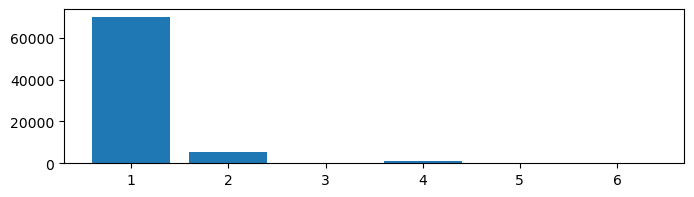

In [173]:
#Analyse Marital status
df_MarStat_Acdmc = df[['Marital status','Target']]
df_MarStat_Acdmc=df_MarStat_Acdmc.groupby('Marital status').count().reset_index()
plt.figure(figsize=(8,2))
plt.bar(df_MarStat_Acdmc['Marital status'],df_MarStat_Acdmc['Target'])
plt.show()

<Figure size 1000x300 with 0 Axes>

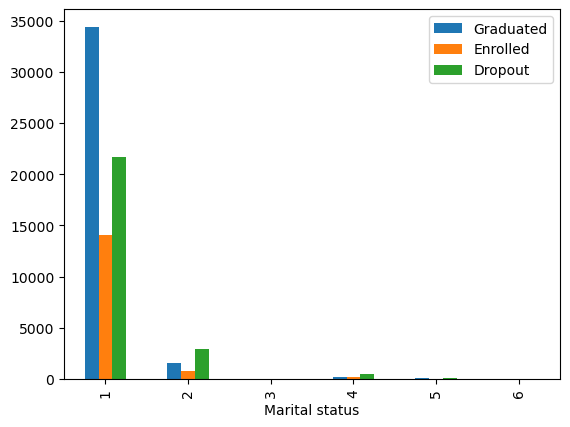

,Marital status,Graduated,Enrolled,Dropout
0,1,34427,14036,21726
1,2,1593,735,2968
2,3,7,2,7
3,4,210,147,509
4,5,40,13,63
5,6,5,7,23


In [174]:
#How  the feature 'Marital status' is impacting to the academic status
col_relation_target('Marital status')

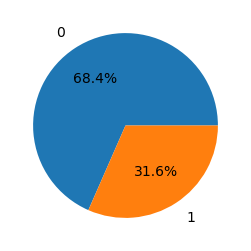

In [175]:
#Analyse the gender feature 
df_MarStat_Acdmc = df[['Gender','Target']]
df_MarStat_Acdmc=df_MarStat_Acdmc.groupby('Gender').count().reset_index()
plt.figure(figsize=(5,3))
plt.pie(labels=df_MarStat_Acdmc['Gender'],x=df_MarStat_Acdmc['Target'],autopct='%1.1f%%',labeldistance=1.2)
plt.show()

<Figure size 1000x300 with 0 Axes>

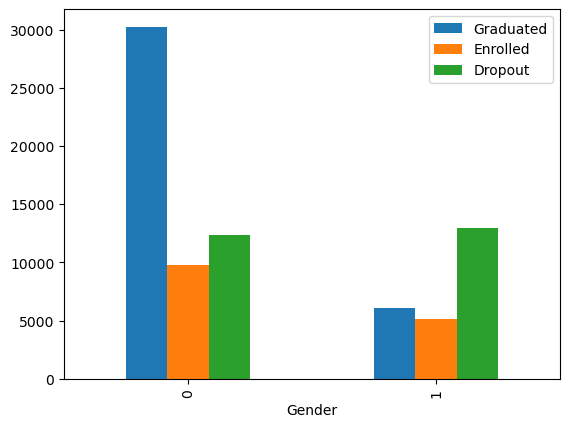

,Gender,Graduated,Enrolled,Dropout
0,0,30232,9804,12316
1,1,6050,5136,12980


In [176]:
#How  the feature 'Gender' is impacting to the academic status
col_relation_target('Gender')

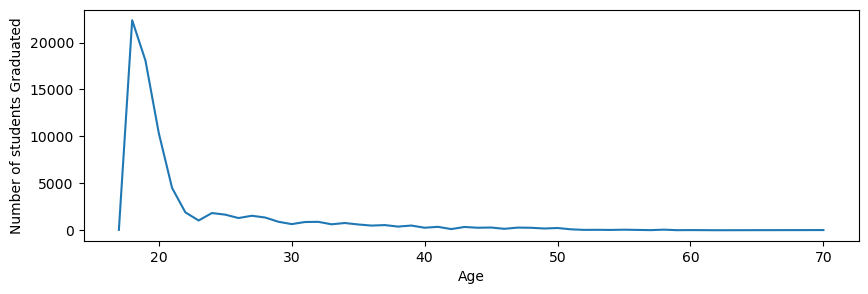

In [177]:
#Relation between 'Age at enrollment' and number of stundents
df_MarStat_Acdmc = df[['Age at enrollment','Target']]
df_MarStat_Acdmc=df_MarStat_Acdmc.groupby('Age at enrollment').count().reset_index()
plt.figure(figsize=(10,3))
plt.plot(df_MarStat_Acdmc['Age at enrollment'],df_MarStat_Acdmc['Target'])
plt.xlabel('Age')
plt.ylabel('Number of students Graduated')
plt.show()

<Figure size 1000x300 with 0 Axes>

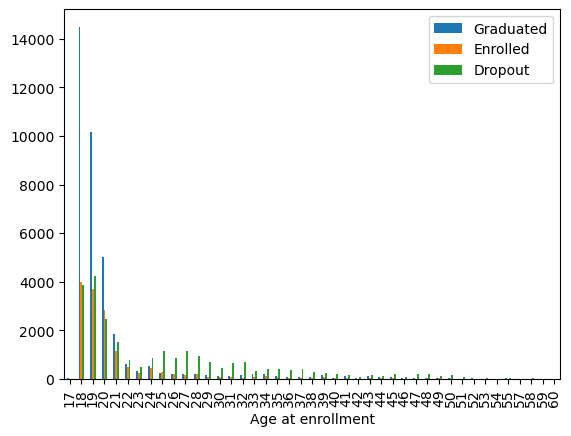

,Age at enrollment,Graduated,Enrolled,Dropout
0,17,32,4,4
1,18,14490,4001,3886
2,19,10149,3709,4220
3,20,5037,2841,2489
4,21,1870,1131,1515
5,22,633,504,770
6,23,333,227,482
7,24,518,442,874
8,25,237,293,1132
9,26,214,209,877


In [178]:
#How  the feature 'Age at enrollment' is impacting to the academic status
col_relation_target('Age at enrollment')

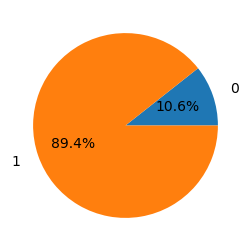

In [179]:
# Analyse'Tuition fees up to date' feature 
df_MarStat_Acdmc = df[['Tuition fees up to date','Target']]
df_MarStat_Acdmc=df_MarStat_Acdmc.groupby('Tuition fees up to date').count().reset_index()
plt.figure(figsize=(5,3))
plt.pie(labels=df_MarStat_Acdmc['Tuition fees up to date'],x=df_MarStat_Acdmc['Target'],autopct='%1.1f%%',labeldistance=1.2)
plt.show()

<Figure size 1000x300 with 0 Axes>

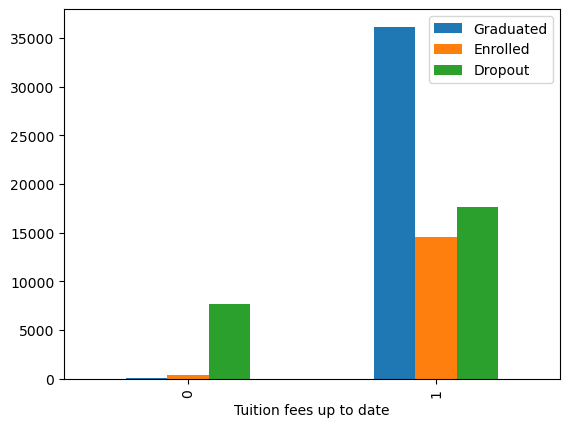

,Tuition fees up to date,Graduated,Enrolled,Dropout
0,0,130,363,7645
1,1,36152,14577,17651


In [180]:
#Relation between 'Tuition fees up to date' and academic status
col_relation_target('Tuition fees up to date')

#### Null Values

In [182]:
#Check the null values presence in traing data set
df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

#### Feature Engineering

In [184]:
#Find the Feature Correlationship
df.iloc[:,:-1].corr()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
id,1.000000,0.009796,-0.003956,-0.007129,0.002111,0.002192,-0.005403,-0.003635,0.002437,0.001159,...,0.003339,-0.007880,-0.001978,-0.004794,-0.001264,0.000206,-0.003217,-0.001539,0.000648,0.002916
Marital status,0.009796,1.000000,0.307324,-0.113951,0.023141,-0.323587,0.084064,-0.037717,0.004660,0.198373,...,0.023511,0.037268,-0.005177,-0.021254,-0.111369,-0.111216,0.025689,-0.034481,0.019523,-0.046165
Application mode,-0.003956,0.307324,1.000000,-0.238497,0.040452,-0.354834,0.451252,-0.060636,0.005937,0.163590,...,0.033103,0.159977,0.013383,0.047992,-0.274728,-0.271664,0.043298,0.098439,0.005130,-0.065964
Application order,-0.007129,-0.113951,-0.238497,1.000000,0.054168,0.147153,-0.155281,-0.013956,-0.016601,-0.062138,...,-0.018316,-0.066853,0.150224,-0.005080,0.166433,0.106326,-0.019871,-0.066022,-0.004206,0.031860
Course,0.002111,0.023141,0.040452,0.054168,1.000000,-0.041557,-0.011349,-0.069488,-0.018786,0.018063,...,0.012660,-0.066453,0.613658,0.328303,0.249484,0.316896,0.018007,-0.001982,0.007152,0.024719
Daytime/evening attendance,0.002192,-0.323587,-0.354834,0.147153,-0.041557,1.000000,-0.057775,0.067332,0.006357,-0.199593,...,0.023854,-0.071575,0.059326,0.023615,0.120979,0.110837,-0.014665,0.063861,-0.045270,0.037908
Previous qualification,-0.005403,0.084064,0.451252,-0.155281,-0.011349,-0.057775,1.000000,0.105284,-0.010346,0.001252,...,0.003897,0.128899,0.027733,0.080597,-0.069113,-0.059210,0.001979,0.130838,-0.046189,0.013527
Previous qualification (grade),-0.003635,-0.037717,-0.060636,-0.013956,-0.069488,0.067332,0.105284,1.000000,0.007707,-0.034497,...,0.000599,-0.000320,0.030076,-0.048591,0.121827,0.089353,-0.011397,0.052112,0.028678,-0.053731
Nacionality,0.002437,0.004660,0.005937,-0.016601,-0.018786,0.006357,-0.010346,0.007707,1.000000,-0.024836,...,0.010347,0.006125,-0.012356,-0.000051,-0.008279,-0.005232,0.002579,0.001823,0.001536,0.020058
Mother's qualification,0.001159,0.198373,0.163590,-0.062138,0.018063,-0.199593,0.001252,-0.034497,-0.024836,1.000000,...,0.014500,0.017870,-0.008667,0.002528,-0.083516,-0.082805,0.017145,-0.126686,0.068696,-0.099992


<Axes: >

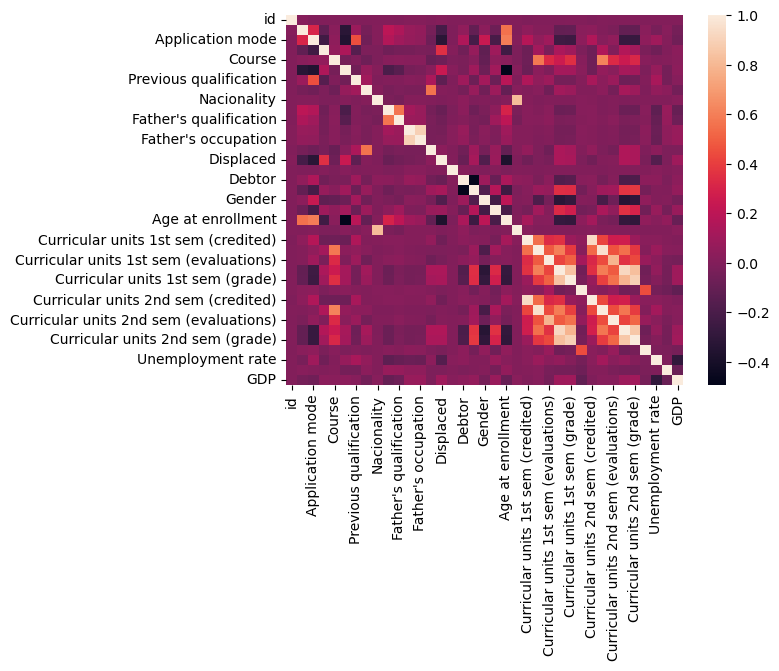

In [185]:
# Feture correlationships in heatmap
sns.heatmap(df.iloc[:,:-1].corr())

<Axes: >

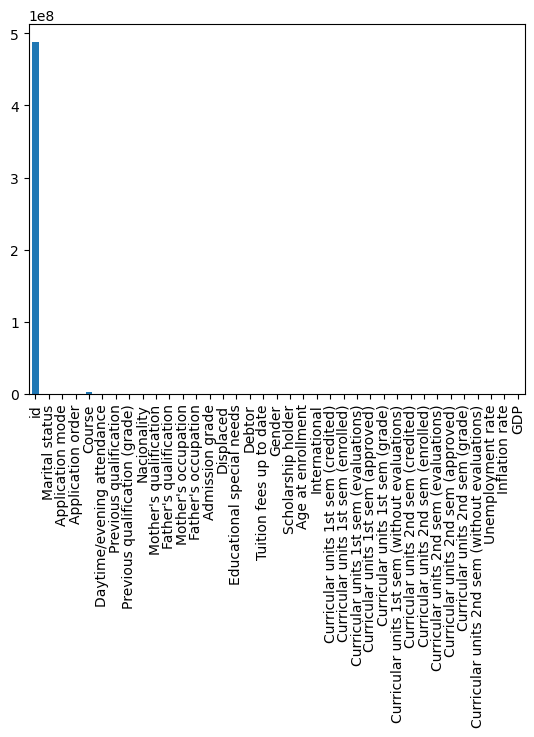

In [186]:
# Find the variance of each feature
df_var = df.iloc[:,:-1].var()
df_var.plot.bar()

#### Summary Statistics

In [188]:
df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


## Prepare The Test and Train data

In [190]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape, y.shape)

(76518, 37) (76518,)


In [191]:
scaler = StandardScaler()
X_MMS_Scaled = scaler.fit_transform(X)

In [192]:
#Follow encoding as the target is the catagorical
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [193]:
#Split the data for train and test
X_train, X_test, y_train, y_test = train_test_split(X_MMS_Scaled,y_encoded, train_size=.8, random_state=45)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(61214, 37) (15304, 37) (61214,) (15304,)


## Create Model and find the best model

In [195]:
#Fit to the models and find the best model
models=[]
Best_Model={}
models.append(('lr',LogisticRegression()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('GB',GaussianNB()))
models.append(('KNN',KNeighborsClassifier()))


for name,model in models:
    kfold=KFold(n_splits=10)
    crossvalscore=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=kfold)
    Best_Model[model]=crossvalscore.mean()
    print('{}:model {}:accuracy {}:standard_deviation {}'.format(name,model,crossvalscore.mean(),crossvalscore.std()))
    
Bestmodel_accuracy=max(Best_Model.values())
Bestmodel_Name=max(Best_Model,key=Best_Model.get)
print("Best model is ",Bestmodel_Name," and accuracy is : ",Bestmodel_accuracy)

lr:model LogisticRegression():accuracy 0.8163819469725772:standard_deviation 0.0031364038158310644
DT:model DecisionTreeClassifier():accuracy 0.7384750235384304:standard_deviation 0.00400700636484327
RF:model RandomForestClassifier():accuracy 0.8237005294672436:standard_deviation 0.0035009756104102106
GB:model GaussianNB():accuracy 0.7628973973148817:standard_deviation 0.0034631464683986405
KNN:model KNeighborsClassifier():accuracy 0.773760976039076:standard_deviation 0.004163322088860608
Best model is  RandomForestClassifier()  and accuracy is :  0.8237005294672436


In [196]:
# Create a ML model with best accuracy
model = Bestmodel_Name
model = model.fit(X_MMS_Scaled,y_encoded)

## Predict the academic status for the test with using above model

In [198]:
#Predict the academic status
test = pd.read_csv('playground_series_data//test.csv')
test_scaled = scaler.fit_transform(test)
test['Target'] = le.inverse_transform(model.predict(test_scaled))
submission = test[['id', 'Target']]

In [199]:
#Create a submission sheet and update the required details
submission.to_csv('playground_series_data//submission.csv',index=False)